<a href="https://colab.research.google.com/github/SergiGR28/SSN/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando 161 puntos de malla.
n= 0 , E(numérico)=2.4694 , E(exacto)=0.0771
n= 1 , E(numérico)=3.8668 , E(exacto)=0.3084
n= 2 , E(numérico)=5.2626 , E(exacto)=0.6940
n= 3 , E(numérico)=7.1536 , E(exacto)=1.2337
n= 4 , E(numérico)=9.4932 , E(exacto)=1.9277
Graficando


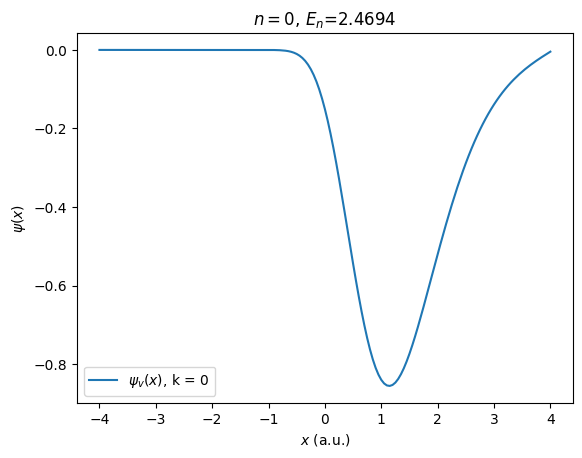

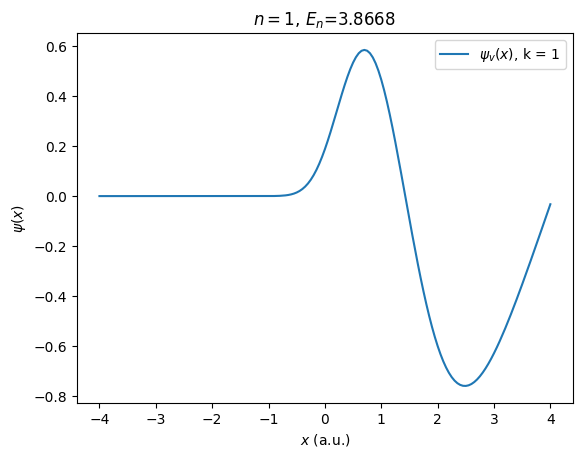

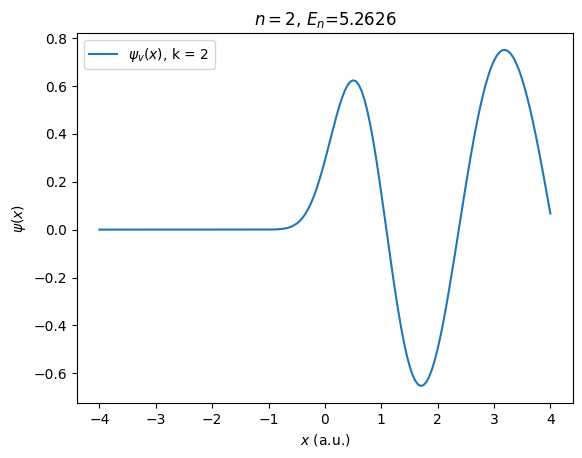

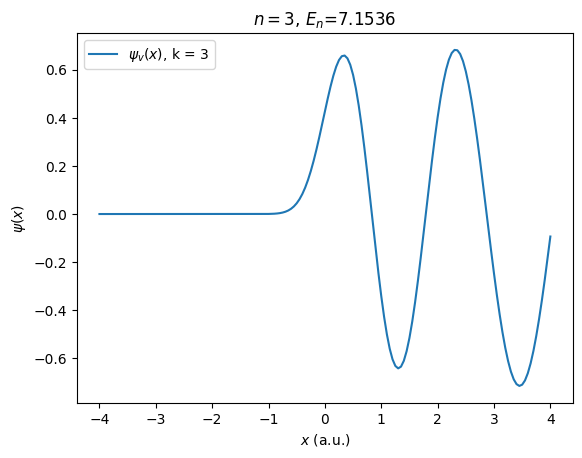

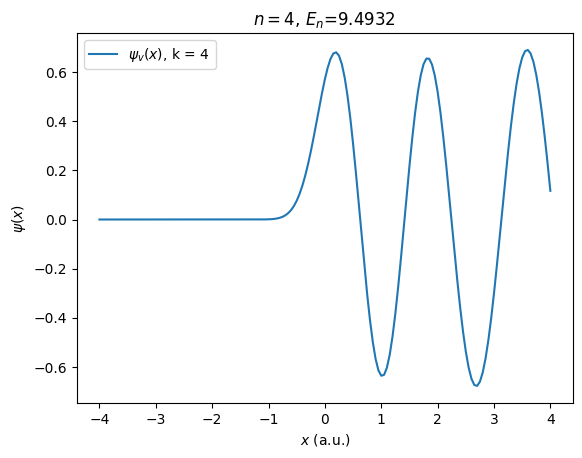

Bye


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Potencial doble morse
def getV(x):
# Parámetros del potencial de Morse doble
  D_e = 2  # Profundidad del pozo
  a = 1     # Parámetro de forma
  x0 = 1    # Distancia entre los mínimos

# Definimos el potencial doble de Morse
  V = D_e * ((1 - np.exp(-a * (x - x0)))**2 + (1 - np.exp(-a * (x + x0)))**2)
  return V

# Discretización de la ecuación de Schrödinger
def Eq(n, h, x):
    F = np.zeros([n, n])
    for i in range(0, n):
        F[i, i] = -2* ((h**2) * getV(x[i]) + 1)
        if i > 0:
            F[i, i-1] = 1
            if i < n-1:
                F[i, i+1] = 1
    return F

# Intervalo de cálculo de la función de onda
L = 8
xlower = -L / 2.0
xupper = L / 2.0

# Opciones de discretización
h = 0.05  # Paso en el espacio

# Crear coordenadas donde se calculará la solución
x = np.arange(xlower, xupper + h, h)
npoints = len(x)  # Tamaño de la malla

print("Usando", npoints, "puntos de malla.")

# Cálculo de la ecuación de Schrödinger y diagonalización
F = Eq(npoints, h, x)
eigenValues, eigenVectors = np.linalg.eig(F)

# Ordenar resultados por autovalores
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:, idx]

# Cálculo de niveles de energía
E = -w / (2.0 * h**2)
for k in range(0, 5):
    E_exact = (float(k+1) * (np.pi))**2.0 / (2.0 * L * L)
    print("n=", k, ", E(numérico)=%.4f" % E[k], ', E(exacto)=' + '{:.4f}'.format(E_exact))

# Inicializar función de onda
psi = [None] * npoints

# Cálculo de funciones de onda normalizadas
for k in range(0, len(w)):
    psi[k] = vs[:, k]
    integral = h * np.dot(psi[k], psi[k])
    psi[k] = psi[k] / integral**0.5

# Graficar funciones de onda
print("Graficando")
for v in range(0, 5):
    plt.plot(x, psi[v], label=r'$\psi_v(x)$, k = ' + str(v))
    plt.title(r'$n=$' + str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
    plt.legend()
    plt.xlabel(r'$x$ (a.u.)')
    plt.ylabel(r'$\psi(x)$')
    plt.show()

print("Bye")
